<a href="https://colab.research.google.com/github/RafaelRamos19/Deep-learning-aeroporto/blob/main/Deep_learning_passageiros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt



In [ ]:
uri = 'https://raw.githubusercontent.com/alura-cursos/deeptime/aula1/Passageiros.csv'
passageiros = pd.read_csv(uri)
passageiros

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121
...,...,...
139,1960.583333,606
140,1960.666667,508
141,1960.750000,461
142,1960.833333,390


Com 1/12 = 0.8333, os valores de tempo estão organizados por: numero.mês

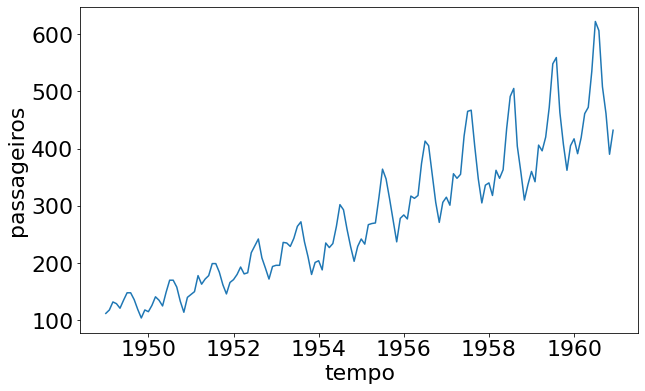

In [ ]:
mpl.rcParams['figure.figsize'] = (10, 6)
mpl.rcParams['font.size'] = 22
sns.lineplot(x='tempo',y='passageiros', data = passageiros)

## Preprocessamento

Precisamos primeiro normalizar os nossos dados

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
sc.fit(passageiros)

StandardScaler()

In [ ]:
dado_escalado = sc.transform(passageiros)

Dados escalados

In [ ]:
x = dado_escalado[:,0]
y = dado_escalado[:,1]

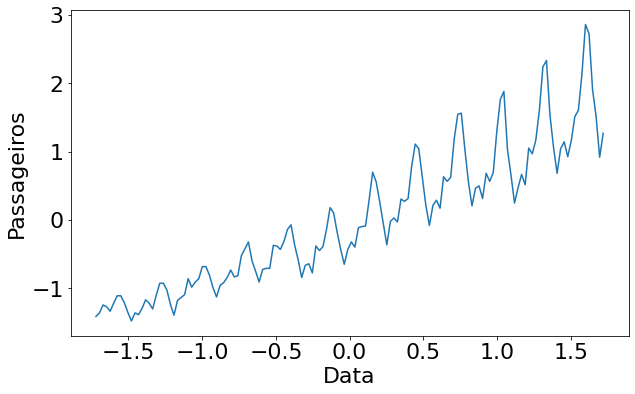

In [ ]:
plt.ylabel('Passageiros')
plt.xlabel('Data')
sns.lineplot(x = x, y=y, data='dado_escalado')

Agora os dados estão em escala

Separando dados de treino e de teste

In [ ]:
tamanho_treino = int(len(passageiros)*0.9)
tamanho_teste = int(len(passageiros) - tamanho_treino)

In [ ]:
xtreino = x[0:tamanho_treino]
ytreino = y[0:tamanho_treino]

In [ ]:
xteste = x[tamanho_treino:]
yteste = y[tamanho_treino:]

Text(0.5, 0, 'Data')

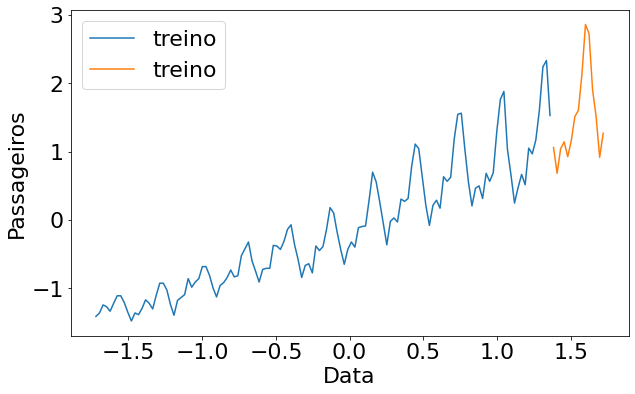

In [ ]:
sns.lineplot(x = xtreino, y = ytreino, label='treino')
sns.lineplot(x = xteste, y = yteste, label='treino')
plt.ylabel('Passageiros')
plt.xlabel('Data')

## Regressão
Como vimos o gráfico possui uma tendência de reta, dessa forma vamos fazer uma regressão linear

Ela será bastante simples, vamos passar a data e a rede neural retornará o número de passageiros


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
regressor = Sequential()

Adicionando uma camada densa, ou seja, cada neurônio se ligando com os demais 

In [ ]:
regressor.add(Dense(1,input_dim = 1, kernel_initializer='Ones',use_bias= False, activation='linear'))

kernel_initializer='Ones" está inicializando os pesos com o valor 1.

use_bias = False, não usando vises, ou seja, sem usar um coeficiente linear


Vamos usar uma função linear de ativação que irá multiplicar por 1 : activation='linear'

In [ ]:
regressor.compile(loss='mean_squared_error', optimizer = 'adam') # medindo a diferença entre os valores teóricos e os obtidos

In [ ]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 1         
                                                                 
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


Possuimos dois parâmetros que são os pesos e bais, podemos tentar otimiza-los para conseguir um melhor resultado

In [ ]:
regressor.fit(xtreino, ytreino)

5/5 [==============================] - 1s 3ms/step - loss: 0.1284


In [ ]:
y_predict = regressor.predict(xtreino)

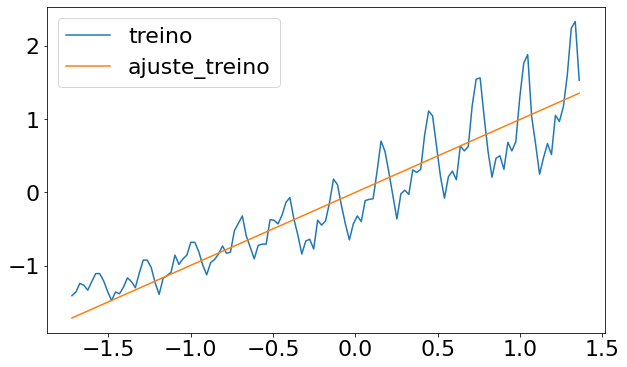

In [ ]:
sns.lineplot(x = xtreino, y = ytreino,label='treino')
sns.lineplot(x = xtreino, y = y_predict[:,0], label='ajuste_treino')

A reta parece estar se ajustando legal aos dados

Mudando a escala

In [ ]:
d = {'tempo': xtreino, 'passageiros':y_predict[:,0]}

In [ ]:
resultados = pd.DataFrame(data = d)
resultados.head()

,tempo,passageiros
0,-1.720064,-1.711919
1,-1.696007,-1.687976
2,-1.671950,-1.664033
3,-1.647894,-1.640090
4,-1.623837,-1.616147


In [ ]:
resultado_transf = pd.DataFrame(data = sc.inverse_transform(resultados), columns = ['tempo', 'passageiros'])
resultado_transf.head()

,tempo,passageiros
0,1949.000000,75.640313
1,1949.083333,78.502669
2,1949.166667,81.365026
3,1949.250000,84.227368
4,1949.333333,87.089739


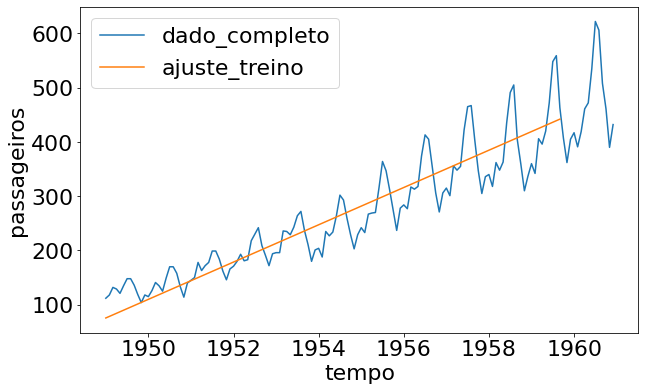

In [ ]:
sns.lineplot(x = 'tempo', y = 'passageiros', data=passageiros, label='dado_completo')
sns.lineplot(x = 'tempo',y='passageiros', data =resultado_transf, label='ajuste_treino' )

In [ ]:
y_predict_teste = regressor.predict(xteste)

In [ ]:
d = {'tempo':xteste, 'passageiros':y_predict_teste[:,0]}
resultados_teste = pd.DataFrame(data = d)

In [ ]:
resultado_transf_teste = pd.DataFrame(sc.inverse_transform(resultados_teste), columns = ['tempo', 'passageiros'])
resultado_transf_teste.head()

,tempo,passageiros
0,1959.750000,444.883948
1,1959.833333,447.746319
2,1959.916667,450.608661
3,1960.000000,453.471003
4,1960.083333,456.333374


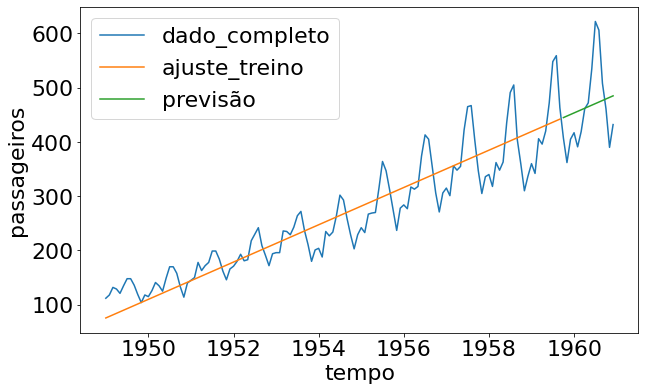

In [ ]:
sns.lineplot(x = 'tempo', y = 'passageiros', data=passageiros, label='dado_completo')
sns.lineplot(x = 'tempo',y='passageiros', data =resultado_transf, label='ajuste_treino' )
sns.lineplot(x = 'tempo',y='passageiros', data = resultado_transf_teste, label = 'previsão')

Como podemos ver o nosso programa realmente aprendeu a prever uma reta para os dados

Adicionando mais camadas

In [ ]:
regressor2 = Sequential()

In [ ]:
regressor2.add(Dense(8,input_dim = 1,kernel_initializer='random_uniform', activation='linear', use_bias = False))

regressor2.add(Dense(8,kernel_initializer='random_uniform', activation='linear', use_bias = False))

regressor2.add(Dense(1,kernel_initializer='random_uniform', activation='linear', use_bias = False))

In [ ]:
regressor2.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
regressor2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 8)                 8         
                                                                 
 dense_2 (Dense)             (None, 8)                 64        
                                                                 
 dense_3 (Dense)             (None, 1)                 8         
                                                                 
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [ ]:
regressor2.fit(xtreino, ytreino, epochs=200)

Epoch 1/200
5/5 [==============================] - 0s 3ms/step - loss: 0.8091
Epoch 2/200
5/5 [==============================] - 0s 3ms/step - loss: 0.8085
Epoch 3/200
5/5 [==============================] - 0s 3ms/step - loss: 0.8077
Epoch 4/200
5/5 [==============================] - 0s 3ms/step - loss: 0.8066
Epoch 5/200
5/5 [==============================] - 0s 3ms/step - loss: 0.8051
Epoch 6/200
5/5 [==============================] - 0s 12ms/step - loss: 0.8030
Epoch 7/200
5/5 [==============================] - 0s 4ms/step - loss: 0.8002
Epoch 8/200
5/5 [==============================] - 0s 4ms/step - loss: 0.7965
Epoch 9/200
5/5 [==============================] - 0s 4ms/step - loss: 0.7914
Epoch 10/200
5/5 [==============================] - 0s 4ms/step - loss: 0.7847
Epoch 11/200
5/5 [==============================] - 0s 4ms/step - loss: 0.7760
Epoch 12/200
5/5 [==============================] - 0s 4ms/step - loss: 0.7647
Epoch 13/200
5/5 [==============================] - 0s 4ms/s

In [ ]:
y_predict = regressor2.predict(xtreino)

y_predict_teste = regressor2.predict(xteste)

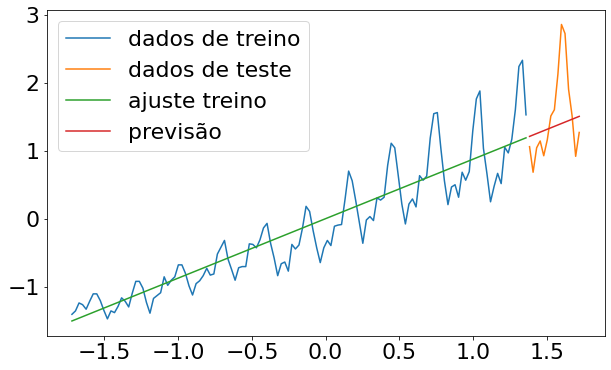

In [ ]:
sns.lineplot(x = xtreino, y = ytreino, label='dados de treino')
sns.lineplot(x = xteste, y = yteste, label='dados de teste')
sns.lineplot(x = xtreino, y = y_predict[:,0], label='ajuste treino')
sns.lineplot(x = xteste, y = y_predict_teste[:,0], label='previsão')

Observe que em suma o modelo está fazendo as mesmas previsões mesmo com duas camadas a mais. 

Em todas as camadas estamos usando funcões de ativação lineares, porém podemos colocar funções não lineares no intúito de obter um melhor resultado

A função sigmoide é uma boa opção para o nosso problema pois a mesma pode ser adicionada em camadas intermediárias

In [ ]:
regressor2 = Sequential()

In [ ]:
regressor2.add(Dense(8,input_dim = 1,kernel_initializer='random_uniform', activation='sigmoid', use_bias = False))

regressor2.add(Dense(8,kernel_initializer='random_uniform', activation='sigmoid', use_bias = False))

regressor2.add(Dense(1,kernel_initializer='random_uniform', activation='linear', use_bias = False))

In [ ]:
regressor2.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
regressor2.fit(xtreino, ytreino, epochs=200)

Epoch 1/200
5/5 [==============================] - 1s 4ms/step - loss: 0.7925
Epoch 2/200
5/5 [==============================] - 0s 4ms/step - loss: 0.7884
Epoch 3/200
5/5 [==============================] - 0s 4ms/step - loss: 0.7866
Epoch 4/200
5/5 [==============================] - 0s 3ms/step - loss: 0.7848
Epoch 5/200
5/5 [==============================] - 0s 7ms/step - loss: 0.7821
Epoch 6/200
5/5 [==============================] - 0s 3ms/step - loss: 0.7810
Epoch 7/200
5/5 [==============================] - 0s 5ms/step - loss: 0.7808
Epoch 8/200
5/5 [==============================] - 0s 6ms/step - loss: 0.7801
Epoch 9/200
5/5 [==============================] - 0s 4ms/step - loss: 0.7796
Epoch 10/200
5/5 [==============================] - 0s 7ms/step - loss: 0.7793
Epoch 11/200
5/5 [==============================] - 0s 6ms/step - loss: 0.7794
Epoch 12/200
5/5 [==============================] - 0s 7ms/step - loss: 0.7793
Epoch 13/200
5/5 [==============================] - 0s 8ms/st

In [ ]:
y_predict = regressor2.predict(xtreino)

y_predict_teste = regressor2.predict(xteste)

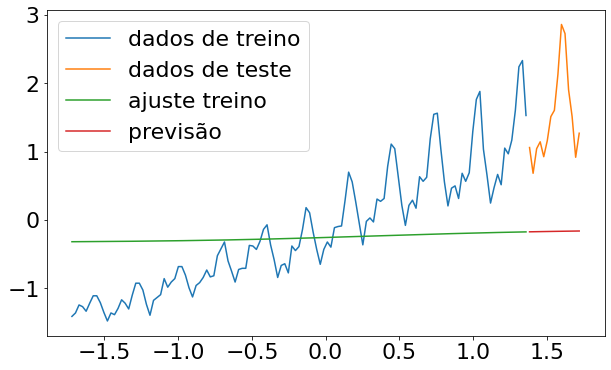

In [ ]:
sns.lineplot(x = xtreino, y = ytreino, label='dados de treino')
sns.lineplot(x = xteste, y = yteste, label='dados de teste')
sns.lineplot(x = xtreino, y = y_predict[:,0], label='ajuste treino')
sns.lineplot(x = xteste, y = y_predict_teste[:,0], label='previsão')

Observe que a perda aumentou e a reta não está se ajustando bem aos dados

##Reformulando o problema


Podemos passar o número de passageiros como se fosse a entrada e também a saída, como se a empresa estivesse querendo saber qual será a quantidade de passageiros em 2020 com dados de 2019

Acontecerá um atraso nos dados e vamos criar uma função para isso

In [ ]:
vetor = pd.DataFrame(ytreino)[0]

In [ ]:
import numpy as np

def separa_dados(vetor, n_passos):
  X_novo, Y_novo = [],[]
  for i in range(n_passos, vetor.shape[0]):
    X_novo.append(list(vetor.loc[i-n_passos: i-1]))
    Y_novo.append(vetor.loc[i])
  X_novo, Y_novo = np.array(X_novo), np.array(Y_novo)
  return X_novo, Y_novo

In [ ]:
xtreino_novo, ytreino_novo = separa_dados(vetor,1)
xtreino_novo[:5]

array([[-1.40777884],
       [-1.35759023],
       [-1.24048348],
       [-1.26557778],
       [-1.33249593]])

In [ ]:
ytreino_novo[:5]

array([-1.35759023, -1.24048348, -1.26557778, -1.33249593, -1.21538918])

Agora possuimos novos valores

Agora vamos repetir isso para os dados de teste

In [ ]:
vetor2 = pd.DataFrame(yteste)[0]

In [ ]:
xteste_novo, yteste_novo = separa_dados(vetor2,1)

Criando a nova rede

In [ ]:
regressor3 = Sequential()
regressor3.add(Dense(8, input_dim = 1, kernel_initializer='Ones', activation='linear', use_bias=False))

regressor3.add(Dense(64, input_dim = 1, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))

regressor3.add(Dense(1, input_dim = 1, kernel_initializer='random_uniform', activation='linear', use_bias=False))

regressor3.compile(loss='mean_squared_error', optimizer='adam')

regressor3.fit(xtreino_novo, ytreino_novo, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 5ms/step - loss: 0.7737
Epoch 2/100
4/4 [==============================] - 0s 8ms/step - loss: 0.7476
Epoch 3/100
4/4 [==============================] - 0s 9ms/step - loss: 0.7262
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7022
Epoch 5/100
4/4 [==============================] - 0s 6ms/step - loss: 0.6807
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 0.6549
Epoch 7/100
4/4 [==============================] - 0s 7ms/step - loss: 0.6284
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 0.5993
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 0.5676
Epoch 10/100
4/4 [==============================] - 0s 5ms/step - loss: 0.5357
Epoch 11/100
4/4 [==============================] - 0s 4ms/step - loss: 0.4977
Epoch 12/100
4/4 [==============================] - 0s 4ms/step - loss: 0.4605
Epoch 13/100
4/4 [==============================] - 0s 5ms/st

In [ ]:
y_predict_novo = regressor3.predict(xtreino_novo)

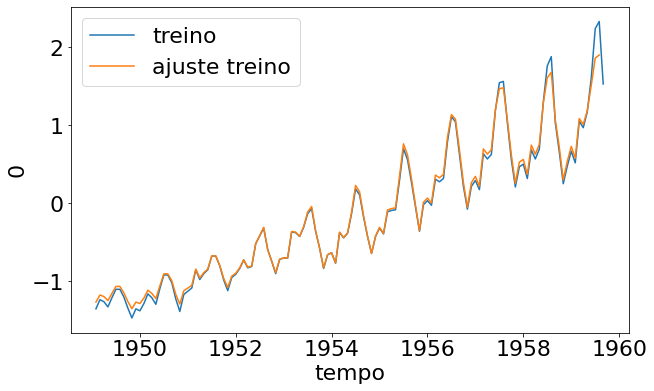

In [ ]:
sns.lineplot(x='tempo', y  =ytreino_novo, data=passageiros[1:129], label='treino')
sns.lineplot(x='tempo', y = pd.DataFrame(y_predict_novo)[0], data=passageiros[1:129], label='ajuste treino')

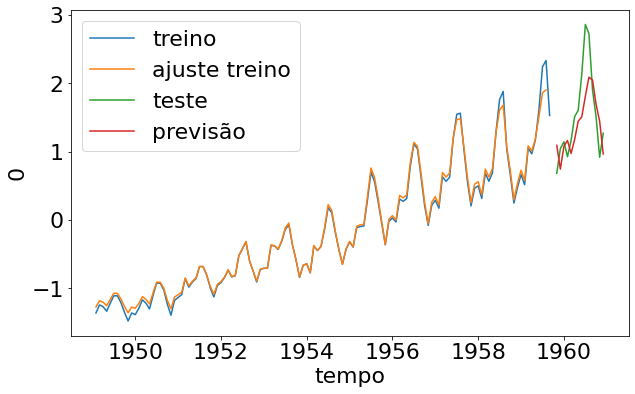

In [ ]:
y_predict_teste_novo = regressor3.predict(xteste_novo)

sns.lineplot(x='tempo', y  =ytreino_novo, data=passageiros[1:129], label='treino')
sns.lineplot(x='tempo', y = pd.DataFrame(y_predict_novo)[0], data=passageiros[1:129], label='ajuste treino')
sns.lineplot(x='tempo', y = yteste_novo, data=passageiros[130:144], label='teste')
sns.lineplot(x='tempo', y =pd.DataFrame(y_predict_teste_novo)[0].values, data=passageiros[130:144], label='previsão')

Agora possuimos uma previsão muito mais satisfatória

## Rdes recorrentes

Usando outra base de dados

In [ ]:
uri = 'https://raw.githubusercontent.com/alura-cursos/deeptime/aula4/bicicletas.csv'
bike = pd.read_csv(uri)
bike.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


Vamos tentar prever a quantidade de bicicletas que serão alugadas no futuro

In [ ]:
bike['datas'] = pd.to_datetime(bike['datas'])
bike.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


(array([735599., 735689., 735780., 735872., 735964., 736055., 736146.,
        736238., 736330.]), <a list of 9 Text major ticklabel objects>)

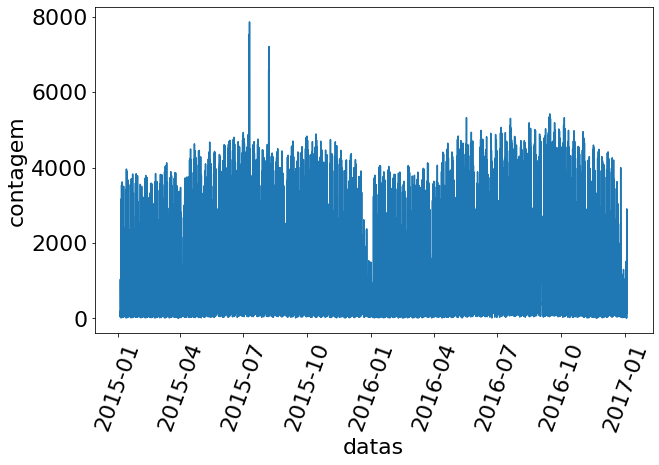

In [ ]:
sns.lineplot(x='datas', y = 'contagem', data=bike)
plt.xticks(rotation=70)

escalando os dados

a contagem de bicicletas será usada na entrada e na saída

In [ ]:
sc2 = StandardScaler()
sc2.fit(bike['contagem'].values.reshape(-1,1))

StandardScaler()

In [ ]:
y = sc2.transform(bike['contagem'].values.reshape(-1,1))

In [ ]:
tamanho_treino = int(len(bike)*0.9)
tamanho_teste = len(bike) - tamanho_treino

In [ ]:
ytreino = y[0:tamanho_treino]

In [ ]:
yteste = y[tamanho_treino:len(bike)]

(array([735599., 735689., 735780., 735872., 735964., 736055., 736146.,
        736238., 736330.]), <a list of 9 Text major ticklabel objects>)

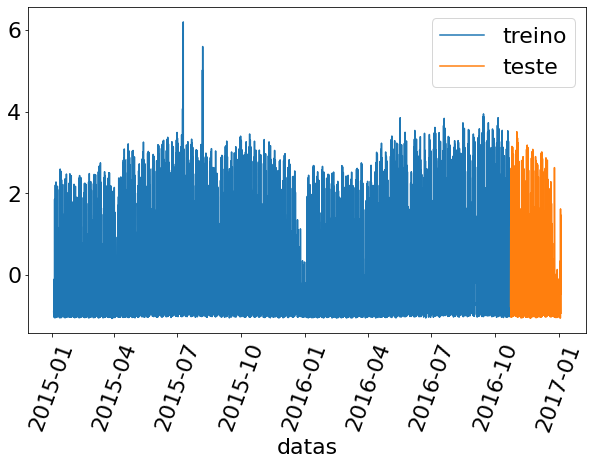

In [ ]:

sns.lineplot(x='datas', y=ytreino[:,0], data = bike[:tamanho_treino], label='treino')
sns.lineplot(x='datas', y=yteste[:,0], data = bike[tamanho_treino:], label='teste')
plt.xticks(rotation=70)

In [ ]:
vetor = pd.DataFrame(ytreino)[0]
xtreino_novo, ytreino_novo = separa_dados(vetor, 10)

In [ ]:
vetor2 = pd.DataFrame(yteste)[0]

In [ ]:
xtreino_novo, ytreino_novo = separa_dados(vetor2, 10)

In [ ]:
xtreino_novo = xtreino_novo.reshape(xtreino_novo.shape[0],xtreino_novo.shape[1],1)

In [ ]:
xteste_novo = xteste_novo.reshape(xteste_novo.shape[0], xteste_novo.shape[1],1)

In [ ]:
recorrente = Sequential()

In [ ]:
from tensorflow.keras.layers import LSTM
recorrente.add(LSTM(128, input_shape = (xtreino_novo.shape[1], xtreino_novo.shape[2])))
recorrente.add(Dense(units=1))

LSTM = memória de longo prazo

In [ ]:
recorrente.compile(loss='mean_squared_error', optimizer ='RMSProp')

In [ ]:
recorrente.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               66560     
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________
